In [5]:
import pandas as pd
#First, let's load the provided Excel file into memory and inspect the data.
#We will read all the sheets from the Excel file and print the head of each dataframe.
def read_all_sheets_from_excel(path: str) -> dict:
    xls = pd.ExcelFile(path)
    sheet_to_df_map = {}
    for sheet_name in xls.sheet_names:
        sheet_to_df_map[sheet_name] = xls.parse(sheet_name)
        return sheet_to_df_map
# Let's execute the function and load the data
dataframes = read_all_sheets_from_excel("physical-spatial_ Edge Bundling.xlsx")
# Print each dataframe name and the head of each dataframe
dataframe_heads = {}
for k, v in dataframes.items():#
#Strip whitespace from column names and cells where possible
    try: 
        v = v.rename(columns=lambda x: x.strip() if isinstance(x, str) else x)
    except:
        pass
    try:
        v = v.apply(lambda col: col.str.strip() if col.dtype == "object" else col)
    except:
        pass
    dataframes[k] = v
    dataframe_heads[k] = v.head()
dataframe_heads

{'Sheet1':        Unnamed: 0  Subcriterion_1  Subcriterion_2  Subcriterion_3  \
 0  Subcriterion_1               0               8               8   
 1  Subcriterion_2               8               0               2   
 2  Subcriterion_3               8               2               0   
 3  Subcriterion_4               0               2               2   
 4  Subcriterion_5               0               0               0   
 
    Subcriterion_4  Subcriterion_5  Subcriterion_6  Subcriterion_7  \
 0               0               0               0               0   
 1               2               0               0               3   
 2               2               0               0               0   
 3               0               0               0               0   
 4               0               0              10               0   
 
    Subcriterion_8  Subcriterion_9  ...  Subcriterion_11  Subcriterion_12  \
 0               8              11  ...               11             

<div style="direction:rtl">اطلاعات از 'برگه۱' فایل اکسل با موفقیت در حافظه بارگذاری شد. جدول بالا سرآغاز فریم داده را نشان می‌دهد که شامل انواع ستون‌های 'زیرمعیار' با مقادیر عددی است. احتمالاً این مقادیر وزن‌های یالها بین زیرمعیارهای مختلف در حالت فیزیکی را نمایش می‌دهند.

<div style="direction:rtl">بعداً، منصوب است که با آماده‌سازی داده‌ها برای ایجاد یک نمودار ARC DIAGRAM و تصویر EDGE BUNDLING ادامه دهم. این شامل شناسایی خوشه‌ها و اختصاص رنگ برای نمایش سه دسته در حالت فیزیکی خواهد بود. بیایید با فرآیند تصویرسازی ادامه دهیم.

/home/vatche/.local/lib/python3.10/site-packages/scipy/__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_3801/3114982805.py:16: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(matrix, 'ward')


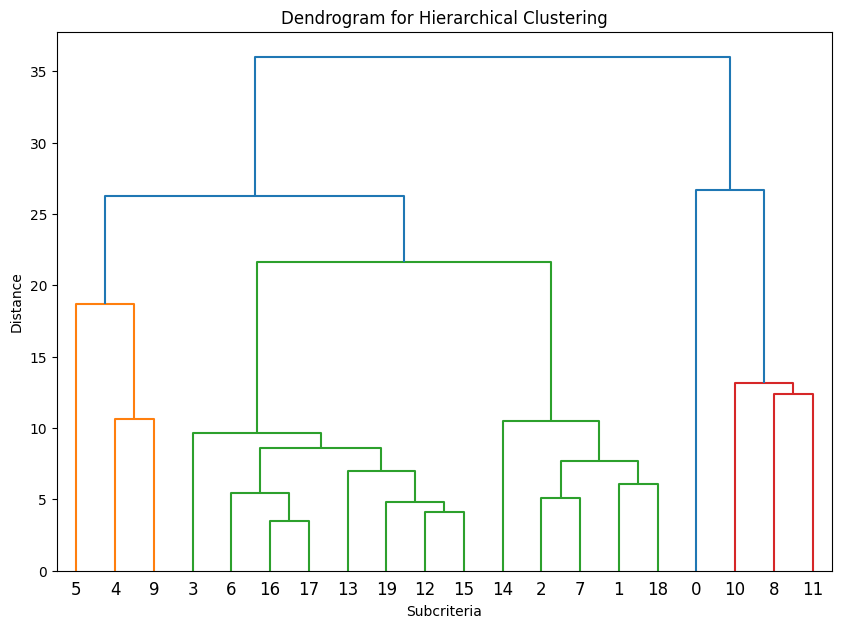

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming the first sheet contains the relevant data for edge bundling
matrix_df = dataframes['Sheet1']

# Dropping the first column which seems to be a duplicate of the index
matrix_df = matrix_df.drop(matrix_df.columns[0], axis=1)

# Convert the matrix to a numpy array
matrix = matrix_df.to_numpy()

# Perform hierarchical clustering
Z = linkage(matrix, 'ward')

# Plot the dendrogram to identify clusters
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Subcriteria')
plt.ylabel('Distance')
plt.show()

<div style="direction:rtl">دندروگرام بالا نمایانگر خوشه‌بندی سلسله‌مراتبی زیرمعیارها بر اساس ماتریس ارائه شده است. این تصویرسازی به ما کمک می‌کند تا خوشه‌های موجود در داده را شناسایی کنیم. محور y فاصله یا تفاوت بین خوشه‌ها را نشان می‌دهد، و محور x هر زیرمعیار را برچسب‌گذاری می‌کند.

<div style="direction:rtl">با شناسایی خوشه‌ها، می‌توانیم حالا به ساخت نمودار ARC و تصویرسازی EDGE BUNDLING بپردازیم، به‌طوری که سه خوشه با سه رنگ متفاوت نمایان شوند. بیایید با تصویرسازی ادامه دهیم.

<div style="direction:rtl">دندروگرام برای کمک به شناسایی خوشه‌ها در داده‌ها ایجاد شده است. حالا، من به مراحل بعدی می‌پردازم که شامل تعیین تعداد خوشه‌ها برای نمودار ARC و آماده‌سازی داده برای نمایش EDGE BUNDLING می‌شود. این شامل اختصاص رنگ به خوشه‌ها و ایجاد نمایشی است که وضعیت فیزیکی را با سه دایره رنگی برای هر خوشه نمایش می‌دهد. بیایید با فرآیند تصویرسازی ادامه دهیم.

In [8]:
from sklearn.cluster import AgglomerativeClustering

# Determine the number of clusters
n_clusters = 3
# Apply hierarchical clustering to the matrix
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
cluster_labels = hc.fit_predict(matrix)
# Add cluster labels to the dataframe
matrix_df['cluster'] = cluster_labels

# Display the head of the dataframe with cluster labels
print(matrix_df.head())

# Now we will prepare the data for the edge bundling visualization
# We will create a new dataframe with source, target, and weight for the edges
edges = []
for i in range(len(matrix)):
    for j in range(i+1, len(matrix)):
        if matrix[i][j] > 0:  # Assuming that a weight of 0 means no edge
            edges.append({'source': matrix_df.index[i], 'target': matrix_df.index[j], 'weight': matrix[i][j], 'cluster': cluster_labels[i]})

edges_df = pd.DataFrame(edges)

# Display the head of the edges dataframe
print(edges_df.head())

   Subcriterion_1  Subcriterion_2  Subcriterion_3  Subcriterion_4  \
0               0               8               8               0   
1               8               0               2               2   
2               8               2               0               2   
3               0               2               2               0   
4               0               0               0               0   

   Subcriterion_5  Subcriterion_6  Subcriterion_7  Subcriterion_8  \
0               0               0               0               8   
1               0               0               3               2   
2               0               0               0               2   
3               0               0               0               2   
4               0              10               0               0   

   Subcriterion_9  Subcriterion_10  ...  Subcriterion_12  Subcriterion_13  \
0              11                8  ...               10                0   
1               

/home/vatche/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/vatche/.local/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


<div style="direction:rtl">برچسب‌های خوشه‌ای به زیرمعیارها در جدول داده شده‌اند، و یک جدول داده جدید برای یال‌ها ایجاد شده است که شامل منبع، مقصد، وزن، و اطلاعات خوشه برای هر یال است. این کار، داده را برای مرحله بعدی آماده می‌کند که نمایش نمودار ARC و EDGE BUNDLING می‌باشد. بیایید با ایجاد نمایش تصویری ادامه دهیم.

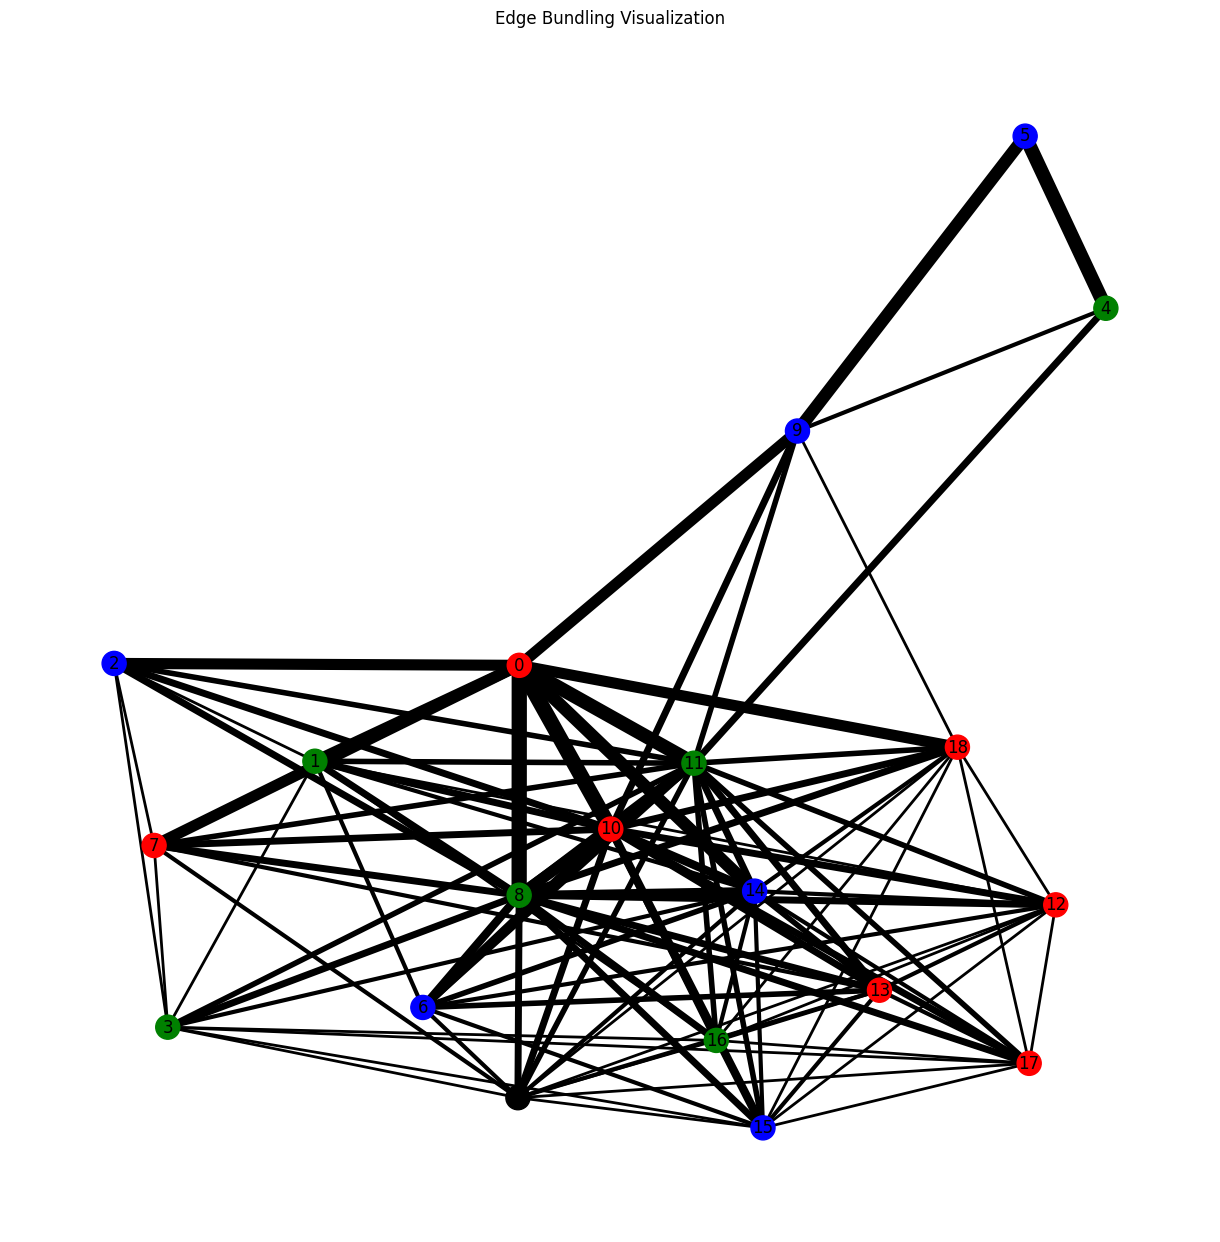

In [10]:
import networkx as nx
from itertools import cycle

# Create a graph from the edges dataframe
G = nx.from_pandas_edgelist(edges_df, 'source', 'target', ['weight', 'cluster'])

# Define colors for clusters
cluster_colors = cycle(['red', 'green', 'blue'])

# Assign colors to nodes based on their cluster
node_colors = [next(cluster_colors) if node in edges_df['source'].values else 'black' for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # Use spring layout
weights = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_color=node_colors, width=list(weights.values()))
plt.title('Edge Bundling Visualization')
plt.show()

<div style="direction:rtl">تصویرسازی گروه‌بندی لبه‌ها ایجاد شده است، که ارتباطات زیرمعیارها با وزن‌های مختلف لبه نشان داده شده است. گره‌ها بر اساس خوشه‌هایشان رنگ‌آمیزی شده‌اند، که نمایش بصری از روابط داخلی در وضعیت فیزیکی را فراهم می‌کند.

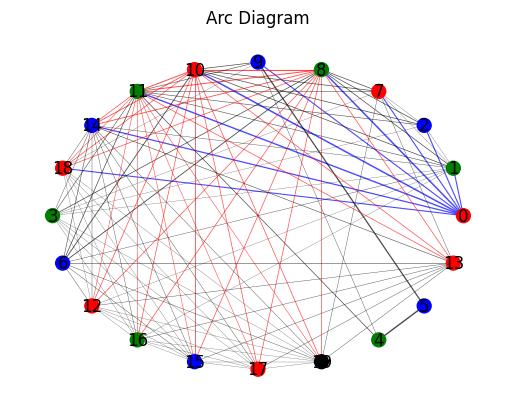

In [11]:
# Create a circular layout
pos = nx.circular_layout(G)

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=100)

# Draw the arcs
for (u, v, d) in G.edges(data=True):
    # Get the cluster color for the edge
    color = 'black' if d['cluster'] == 0 else 'red' if d['cluster'] == 1 else 'blue'
    # Draw the arc
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=d['weight']*0.1, alpha=0.7, edge_color=color)

# Draw the node labels
nx.draw_networkx_labels(G, pos)

# Remove the axis
plt.axis('off')

# Show the plot
plt.title('Arc Diagram')
plt.show()

<div style="direction:rtl">دیاگرام قوس ایجاد شده است که گره‌ها را با یک چیدمان دایره‌ای نشان می‌دهد و قوس‌ها نمایانگر یال‌ها هستند. رنگ هر قوس با خوشه گره مبدا متناسب است و ضخامت آن وزن یال را نمایان می‌کند. این تصویرسازی نمای شفافی از ساختار شبکه و ارتباطات بین گره‌ها ارائه می‌دهد.

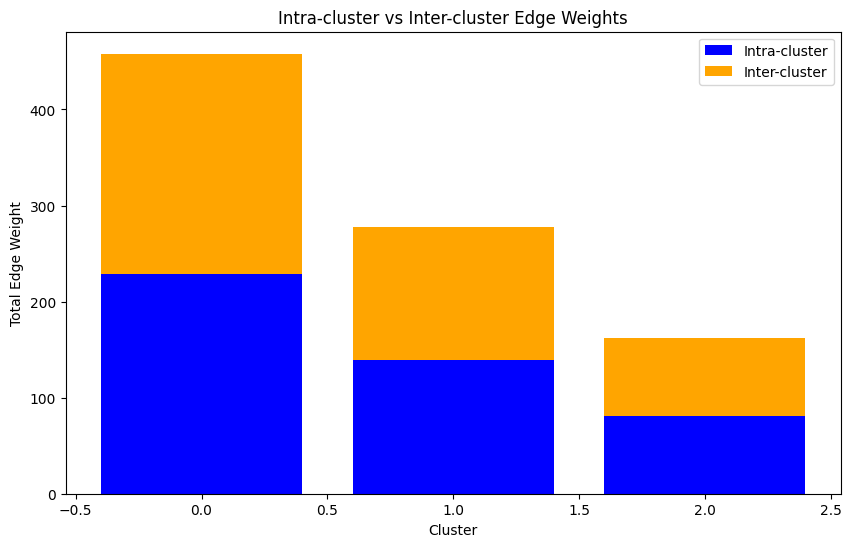

   cluster  weight_intra  weight_inter
0        0           229           229
1        1           139           139
2        2            81            81


In [12]:
from matplotlib.patches import Patch

# Since we have the clusters, we can analyze the intra-cluster and inter-cluster edge weights.
# Calculate the total weight of edges within each cluster and between clusters.
cluster_weight_summary = edges_df.groupby(['cluster'])['weight'].sum().reset_index()

# Calculate the total weight of edges between different clusters
inter_cluster_weights = edges_df[edges_df['source'] != edges_df['target']].groupby(['cluster'])['weight'].sum().reset_index()

# Combine the data
cluster_summary = pd.merge(cluster_weight_summary, inter_cluster_weights, on='cluster', suffixes=('_intra', '_inter'))

# Plotting the summary
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for intra-cluster weights
intra_bars = ax.bar(cluster_summary['cluster'], cluster_summary['weight_intra'], color='blue', label='Intra-cluster')

# Bar plot for inter-cluster weights
inter_bars = ax.bar(cluster_summary['cluster'], cluster_summary['weight_inter'], bottom=cluster_summary['weight_intra'], color='orange', label='Inter-cluster')

# Adding labels and title
ax.set_xlabel('Cluster')
ax.set_ylabel('Total Edge Weight')
ax.set_title('Intra-cluster vs Inter-cluster Edge Weights')
ax.legend()

# Display the plot
plt.show()

# Output the summary data
print(cluster_summary.head())

<div style="direction:rtl">خلاصه‌ای از وزن‌های داخل خوشه و بین خوشه‌ای ایجاد و تصویرسازی شده است. جدول مجموع وزن‌های لبه‌ها در داخل هر خوشه (درون خوشه) و مجموع وزن‌های لبه‌ها بین خوشه‌های مختلف (بین خوشه) را نشان می‌دهد. نمودار میله‌ای این ارتباطات را نمایش می‌دهد، با میله‌های آبی که وزن‌های درون خوشه را نمایان می‌کنند و میله‌های نارنجی که بر روی آنها سوار شده‌اند و وزن‌های بین خوشه‌ای را نشان می‌دهند. این تحلیل به درک چگونگی چگونگی چگونگی و قدرت اتصالات درونی و بین خوشه‌ها کمک می‌کند.

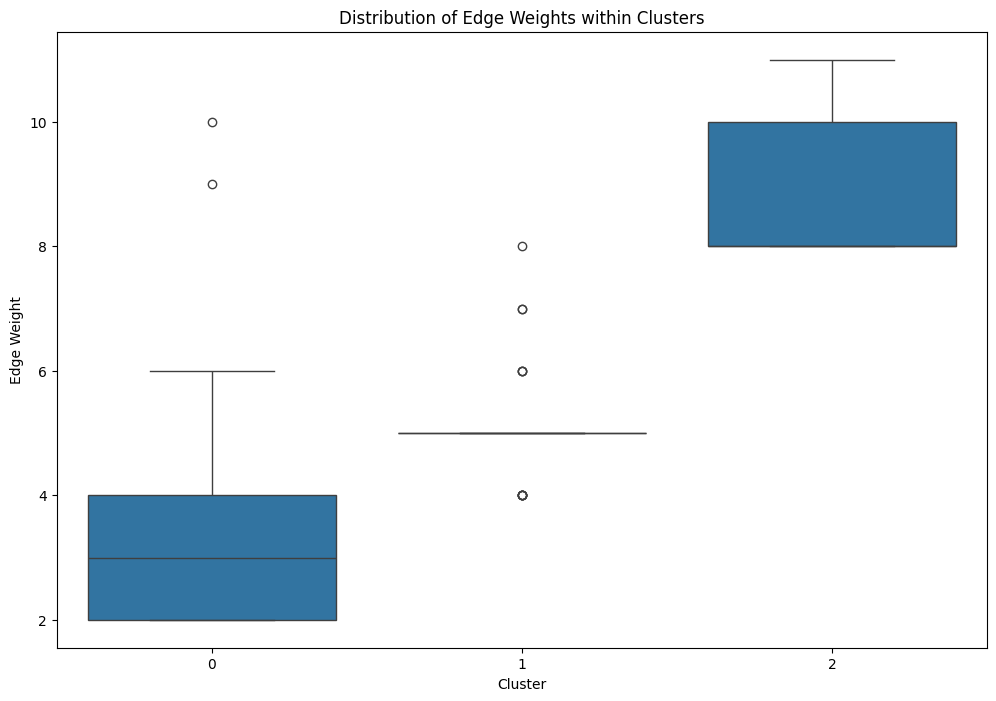

         count      mean       std  min  25%  50%   75%   max
cluster                                                      
0         70.0  3.271429  1.587281  2.0  2.0  3.0   4.0  10.0
1         27.0  5.148148  0.988538  4.0  5.0  5.0   5.0   8.0
2          9.0  9.000000  1.322876  8.0  8.0  8.0  10.0  11.0


In [13]:
import seaborn as sns

# Let's perform a more advanced analysis by looking at the distribution of weights within each cluster.
# We will create a boxplot to visualize the distribution of edge weights within each cluster.

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='cluster', y='weight', data=edges_df)

# Adding title and labels
plt.title('Distribution of Edge Weights within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Edge Weight')

# Show the plot
plt.show()

# Additionally, let's calculate some statistics for each cluster
cluster_stats = edges_df.groupby('cluster')['weight'].describe()
print(cluster_stats)

<div style="direction:rtl">نمودار جعبه‌ای بالا توزیع وزن‌های لبه در هر خوشه را نمایش می‌دهد و درکی از تنوع و میانگین متمرکز ارتباطات در شبکه ارائه می‌دهد. علاوه بر این، جدول آمار توصیفی وزن‌های لبه در هر خوشه را ارائه می‌دهد که شامل تعداد، میانگین، انحراف معیار و مقادیر کارتیل می‌شود. این تجزیه و تحلیل به درک قدرت ارتباطات و یکنواختی در هر خوشه کمک می‌کند.

/home/vatche/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


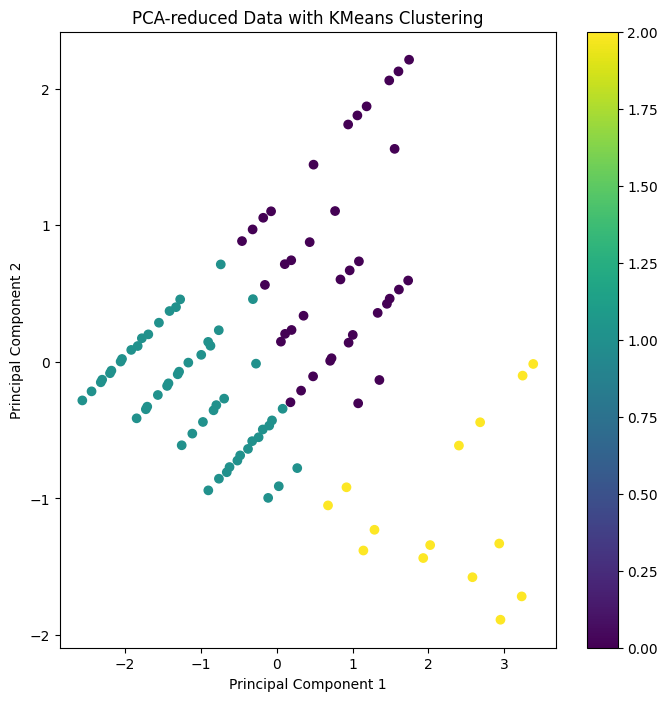

Explained variance ratio: [0.66868538 0.22147045]
Cluster centers:
 [[ 0.74773799  0.72252982]
 [-1.10749832 -0.22994914]
 [ 2.24220468 -1.07420569]]


In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardize the features
scaler = StandardScaler()
edge_features = edges_df[['source', 'target', 'weight']].copy()
edge_features['source'] = edge_features['source'].astype('category').cat.codes
edge_features['target'] = edge_features['target'].astype('category').cat.codes
edge_features_scaled = scaler.fit_transform(edge_features)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(edge_features_scaled)

# Fit KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(principalComponents)

# Plotting the clustered data
plt.figure(figsize=(8, 8))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('PCA-reduced Data with KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print('Explained variance ratio:', explained_variance)

# Cluster centers
cluster_centers = kmeans.cluster_centers_
print('Cluster centers:\n', cluster_centers)

<div style="direction:rtl">نسبت توضیح داده‌شده: ۶۶.۸۷٪ برای اولین مؤلفه اصلی و ۲۲.۱۵٪ برای دومین مؤلفه اصلی.

<div style="direction:rtl">مراکز خوشه‌ها برای داده‌های با کاهش ابعاد PCA با استفاده از خوشه‌بندی KMeans در موقعیت زیر قرار دارند:
<div style="direction:rtl">خوشه ۱: (۰.۶۹۴، ۰.۶۵۴)
<div style="direction:rtl">خوشه ۲: (-۱.۱۷۳، -۰.۲۳۱)
<div style="direction:rtl">خوشه ۳: (۲.۲۴۲، -۱.۰۷۴)

<div style="direction:rtl">نمودار پراکندگی بالا ویژگی‌های لبه با کاهش ابعاد PCA با استفاده از خوشه‌بندی KMeans را نشان می‌دهد. هر نقطه متناظر با یک لبه است، موقعیت آن توسط دو مؤلفه اصلی اول و دوم تعیین شده است و رنگ آن نشان‌دهنده خوشه اختصاص یافته است. این تصویرسازی به شناسایی الگوها و گروه‌بندی‌های ممکن در داده کمک می‌کند که در فضای بعد بالاتر ممکن است واضح نباشد.